https://matplotlib.org/stable/api/index.html

# 1 Fazendo as primeiras visualizações

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dados/monitoramento_tempo_tratado.csv', sep=',')
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data,hora
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01,12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01,13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01,14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01,15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01,16:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
 7   hora                 45253 non-null  object 
dtypes: float64(5), object(3)
memory usage: 2.8+ MB


Transformar a string data no tipo datetime
https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [4]:
df['data'] = pd.to_datetime(df['data'])

https://matplotlib.org/stable/index.html#

In [5]:
import matplotlib.pyplot as plt

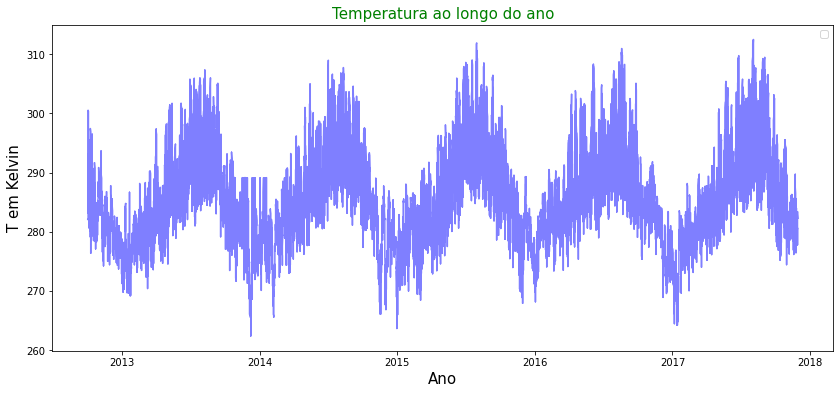

In [6]:
fig, ax = plt.subplots()

ax.set_title('Temperatura ao longo do ano', fontsize=15, color='green')
ax.set_xlabel('Ano', fontsize=15, color='black')
ax.set_ylabel('T em Kelvin', fontsize=15)
fig.set_size_inches(14,6)
ax.legend(['Temperatura'])
ax.plot(df['data'], df['temperatura'], color='blue', alpha=0.5)

Criando gráfico com plt.figure()

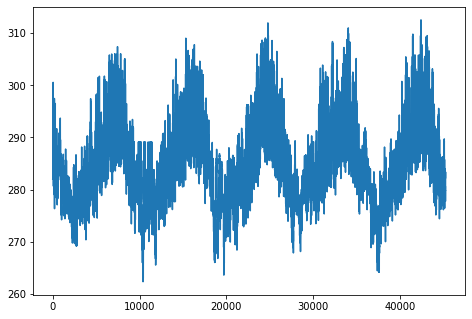

In [7]:
figure = plt.figure(figsize=(12,8))
figure.add_axes([1,1,0.5,0.5])
plt.plot(df['temperatura'])

# 2 Customizando nossas visualizações

## 2.1 Espessura, estilo, foco, marcadores e grades

In [8]:
import datetime

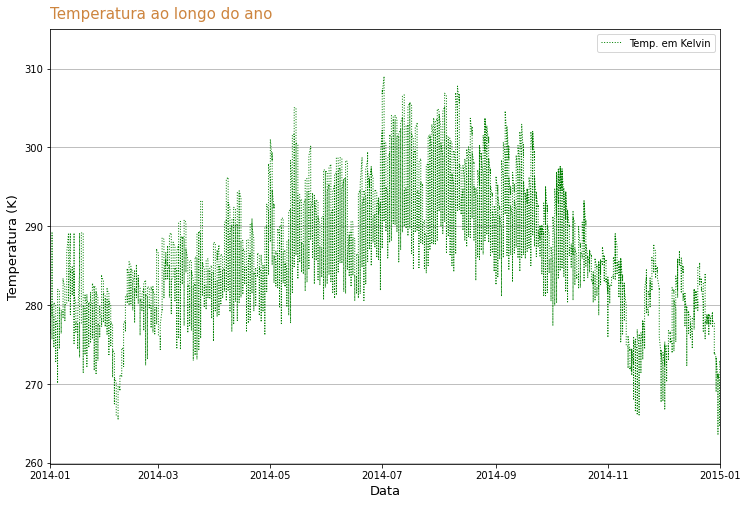

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Temperatura ao longo do ano', loc='left', fontsize=15, y=1.01, color='peru')
ax.set_xlabel('Data', fontsize=13)
ax.set_ylabel('Temperatura (K)', fontsize=13)
ax.plot(df['data'], df['temperatura'], linestyle='dotted', linewidth=1, color='g')
ax.set_xlim(left=datetime.datetime(2014,1,1), right=datetime.datetime(2015,1,1))
#Limitando o plot de x passando datas como argumento
ax.grid(visible=True, axis='y')
ax.legend(['Temp. em Kelvin'])

## 2.2 Mais de um Eixo na mesma visualização

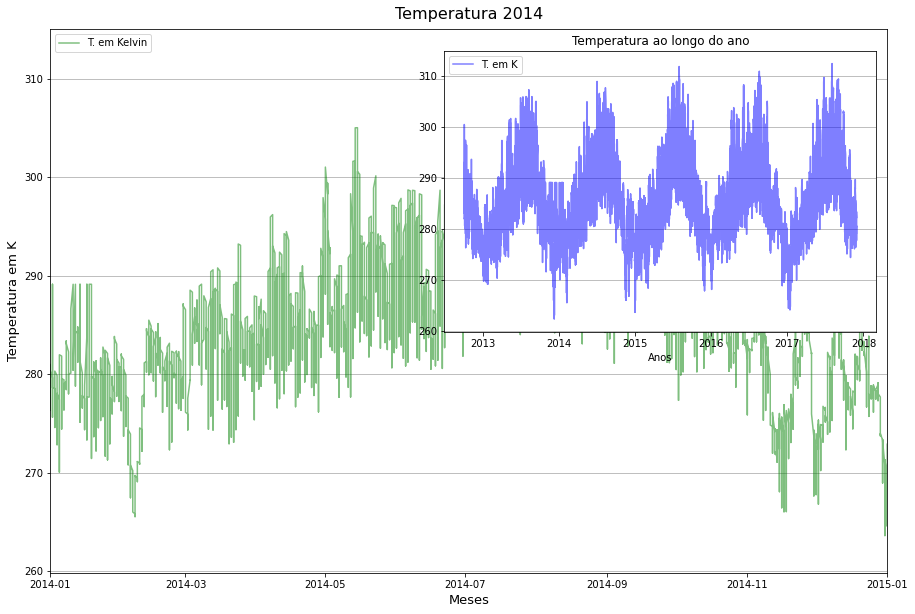

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax2 = fig.add_axes([0.49,0.46, 0.4, 0.39])

ax.plot(df['data'], df['temperatura'], color='g', alpha=0.5)
ax.set_xlim(left=datetime.datetime(2014,1,1), right=datetime.datetime(2015,1,1))
ax.set_title('Temperatura 2014', fontsize=16, pad=10)
ax.set_xlabel('Meses', fontsize=13)
ax.set_ylabel('Temperatura em K', fontsize=13)
ax.legend(['T. em Kelvin'], loc='upper left')
ax.grid(visible=True, axis='y')

ax2.plot(df['data'], df['temperatura'], color='b', alpha=0.5)
ax2.set_xlabel('Anos')
ax2.set_title('Temperatura ao longo do ano')
ax2.grid(True, axis='y')
ax2.legend(['T. em K'], loc='best')

## 2.3 Visualização mais Complexa

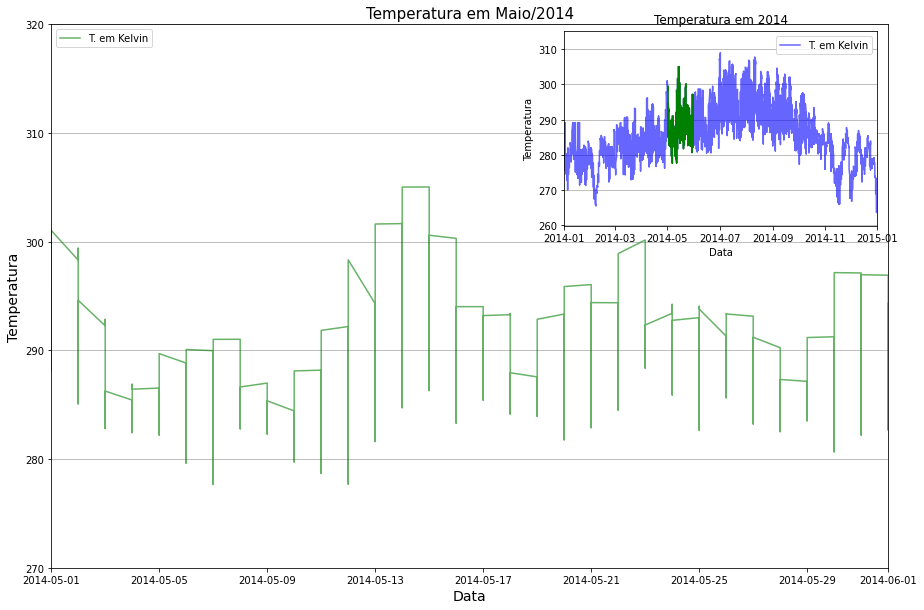

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
ax2 = fig.add_axes([0.6, 0.6, 0.29, 0.27])

ax.plot(df['data'], df['temperatura'], color='g', alpha=0.6)
ax.set_xlim(left=datetime.datetime(2014,5,1), right=datetime.datetime(2014,6,1))
ax.grid(True, axis='y')
ax.set_title('Temperatura em Maio/2014', fontsize=15)
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Temperatura', fontsize=14)
ax.set_ylim(270,320)
ax.legend(['T. em Kelvin'], loc='upper left')

ax2.plot(df['data'], df['temperatura'], color='b', alpha=0.6)
ax2.plot(df.query('data > datetime.date(2014,5,1) and data < datetime.datetime(2014,6,1)')['data'], df.query('data > datetime.date(2014,5,1) and data < datetime.datetime(2014,6,1)')['temperatura'], color='g')
ax2.set_xlim(left=datetime.datetime(2014,1,1), right=datetime.datetime(2015,1,1))
ax2.grid(True, axis='y')
ax2.set_title('Temperatura em 2014', y=1.01)
ax2.set_xlabel('Data')
ax2.set_ylabel('Temperatura')
ax2.legend(['T. em Kelvin'], loc='best')

# 3 Anotações e Diversos gráficos

## 3.1 Linhas de restrição e anotações
    https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html
    https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html

Text(2013-04-02 00:00:00, 267.37, 'Mínimo')

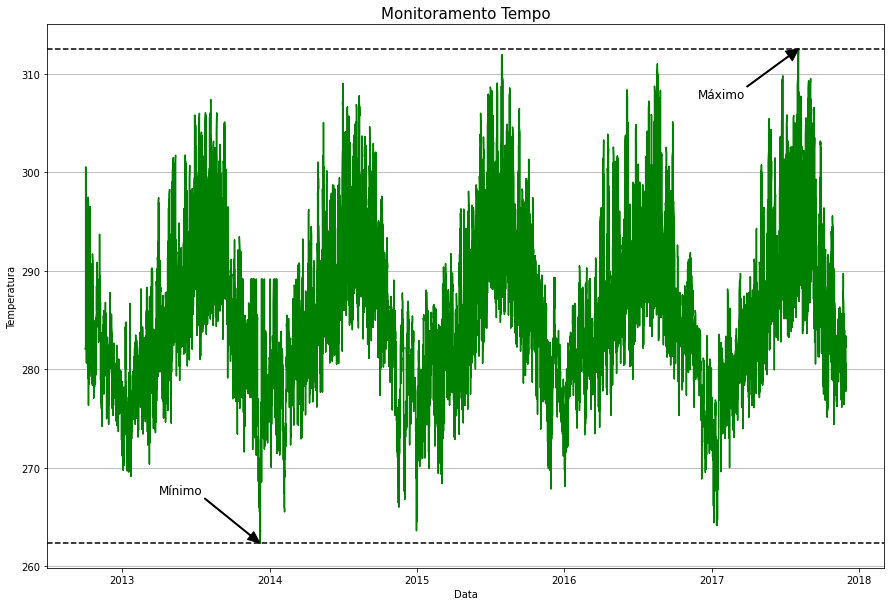

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df['data'], df['temperatura'], color='g')
ax.set_title('Monitoramento Tempo', fontsize=15)
ax.set_xlabel('Data')
ax.set_ylabel('Temperatura')
ax.grid(visible=True, axis='y')

#Adiciondando horizontal lines no máximo e mínimo
ax.axhline(y= max(df['temperatura']), ls='--', color='black')
ax.axhline(y= min(df['temperatura']), ls='--', color='black')

#Anotações c/ seta no ponto (x1,y1) e (x2,y2)
y1 = max(df['temperatura'])
x1 = df['data'][df['temperatura'].idxmax()]
y2 = max(df['temperatura'] -5)
x2 = df['data'][df['temperatura'].idxmax() - 6000]
ax.annotate(text='Máximo', xy=(x1,y1), xytext=(x2,y2), fontsize=12, arrowprops=dict(width=1, facecolor='k'))

y1 = min(df['temperatura'])
x1 = df['data'][df['temperatura'].idxmin()]
y2 = min(df['temperatura'] + 5)
x2 = df['data'][df['temperatura'].idxmin() - 6000]
ax.annotate(text='Mínimo', xy=(x1,y1), xytext=(x2,y2), fontsize=12, arrowprops=dict(width=1, headwidth=10, facecolor='k'))

## 3.2 Algumas outras visualizações
    Plotando média da temperatura nos dias da semana em barras e torta
    https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html
    https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

In [13]:
temperatura_por_dia_da_semana = df.groupby(by=['dia_da_semana'])['temperatura'].mean()
nome_dias = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
temperatura_por_dia_da_semana = temperatura_por_dia_da_semana[nome_dias]
temperatura_por_dia_da_semana

dia_da_semana
Domingo    285.009095
Segunda    284.985382
Terça      284.892811
Quarta     284.998290
Quinta     285.000643
Sexta      285.060886
Sábado     285.003316
Name: temperatura, dtype: float64

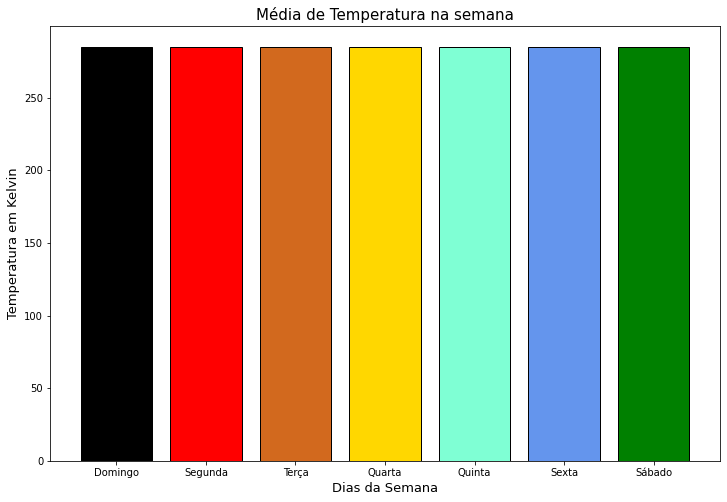

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
cores = ['k', 'red', 'chocolate', 'gold', 'aquamarine', 'cornflowerblue', 'g']
ax.bar(x=temperatura_por_dia_da_semana.index, height=temperatura_por_dia_da_semana, color=cores, edgecolor='k')
ax.set_title('Média de Temperatura na semana', fontsize=15)
ax.set_xlabel('Dias da Semana', fontsize=13)
ax.set_ylabel('Temperatura em Kelvin', fontsize=13)
ax.set_xticks([0,1,2,3,4,5,6], labels=nome_dias)

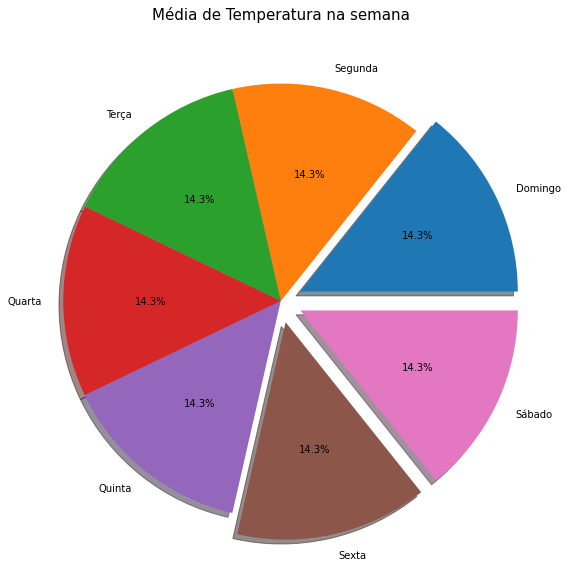

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
ax.pie(x=temperatura_por_dia_da_semana, labels=nome_dias, autopct='%1.1f%%', shadow=True, explode=[0.1,0,0,0,0,0.1,0.1])
ax.set_title('Média de Temperatura na semana', fontsize=15, pad=10)
fig.patch.set_facecolor('white')

# 4 Visualizando dados diferentes

## 4.1 Utilizando gráficos de dispersão
    https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html

In [16]:
df = pd.read_csv('dados/iris.csv')
df.head()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


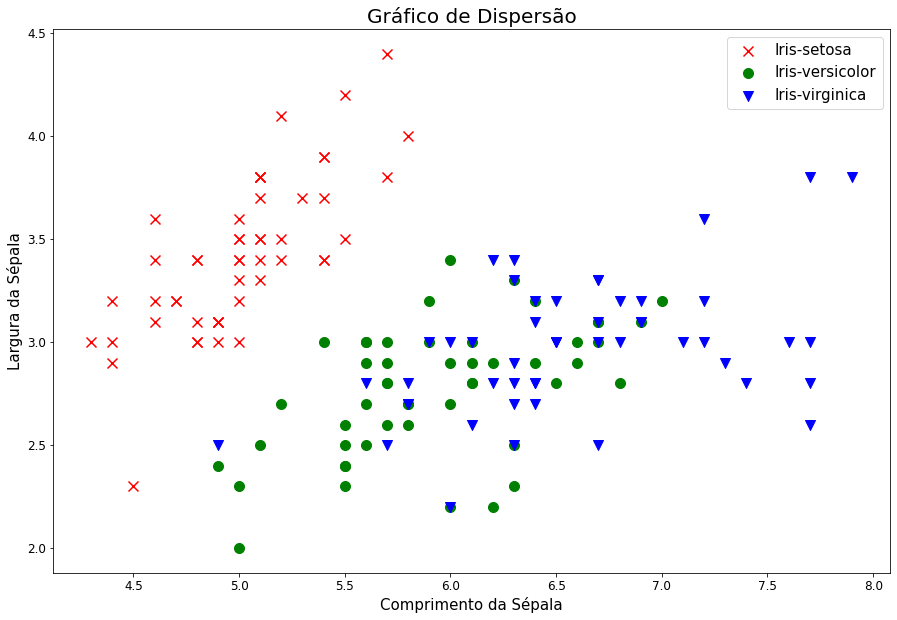

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
#ax.scatter(x=df['comprimento_sépala'], y=df['largura_sépala'])
cores = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b' }
marcadores = {'Iris-setosa':'x', 'Iris-versicolor':'o', 'Iris-virginica':'v' }

for especies in df['espécie'].unique():
    selecao = (df['espécie'] == especies)
    df_aux = df[selecao] 
    ax.scatter(x=df_aux['comprimento_sépala'], y=df_aux['largura_sépala'], c=cores[especies], marker=marcadores[especies], s=100)
    
ax.legend(cores, fontsize=15)
ax.set_title('Gráfico de Dispersão', fontsize=20)
ax.set_xlabel('Comprimento da Sépala', fontsize=15)
ax.set_ylabel('Largura da Sépala', fontsize=15)
ax.tick_params(labelsize=12, colors='k')

## 4.1 Visualizando a Distribuição de Dados
    https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot
    https://matplotlib.org/stable/plot_types/stats/boxplot_plot.html#sphx-glr-plot-types-stats-boxplot-plot-py
    https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py


<AxesSubplot:title={'center':'Box Plot da Largura da Sépala'}>

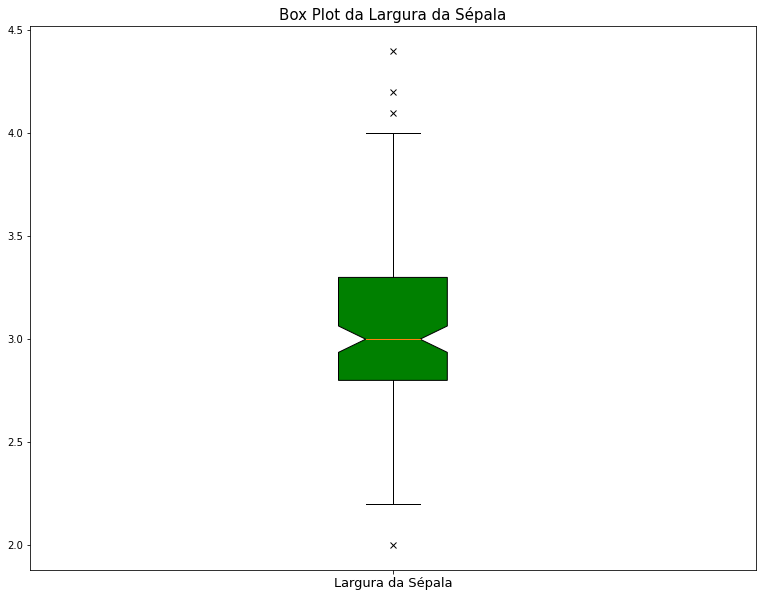

In [34]:
fig, ax = plt.subplots(figsize=(13,10))

bplot = ax.boxplot(df['largura_sépala'], notch=True, sym='x', patch_artist=True)
ax.set_title('Box Plot da Largura da Sépala', fontsize=15)
ax.set_xticklabels(['Largura da Sépala'], fontsize=13)
bplot['boxes'][0].set_facecolor('g')
ax

<AxesSubplot:title={'center':'Box Plot - Iris'}>

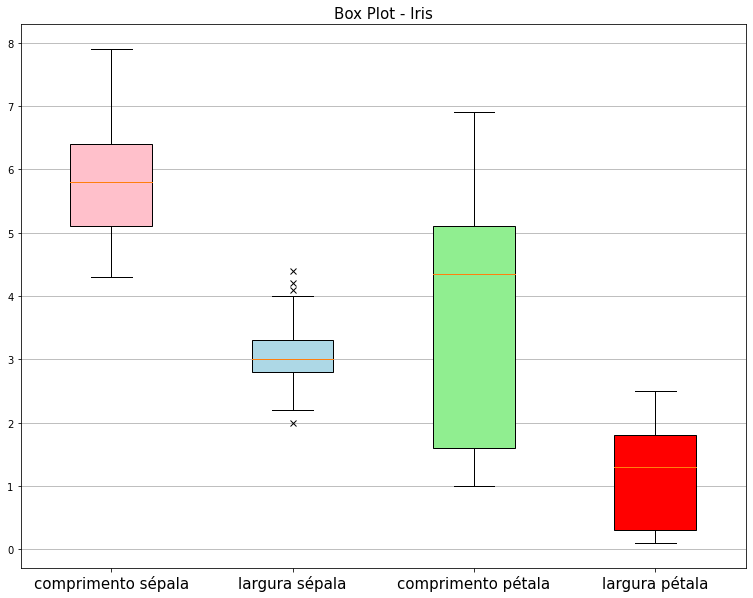

In [54]:
fig, ax = plt.subplots(figsize=(13,10))
labels = ['comprimento sépala', 'largura sépala', 'comprimento pétala', 'largura pétala']
colors = ['pink', 'lightblue', 'lightgreen', 'red']

bplot = ax.boxplot((df.drop('espécie', axis='columns')), patch_artist=True, sym='x')
ax.set_title('Box Plot - Iris', fontsize=15)
ax.grid(True, axis='y')
ax.set_xticklabels(labels=labels, fontsize=15)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax

## 4.2 Outra forma de visualizar a distribuição de dados
    https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html
    https://matplotlib.org/stable/gallery/statistics/hist.html   

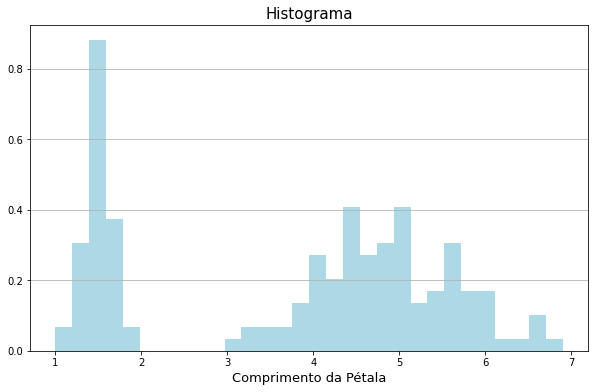

In [59]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(x=df['comprimento_pétala'], color='lightblue', bins=30, density=True)
ax.set_title('Histograma', fontsize=15)
ax.set_xlabel('Comprimento da Pétala', fontsize=13)
ax.grid(True, axis='y')


# 5 Customizando Histogramas
## 5.1 Adicionando anotações e linhas verticais

Text(4.35, 28, 'Mediana')

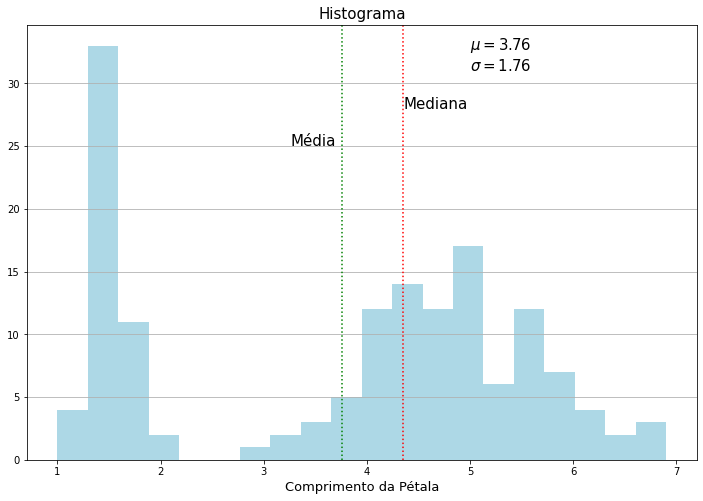

In [76]:
fig, ax = plt.subplots(figsize=(12,8))

mu = df['comprimento_pétala'].mean()
sigma = df['comprimento_pétala'].std()
mediana = df['comprimento_pétala'].median()

ax.hist(x = df['comprimento_pétala'], bins=20, color='lightblue')
ax.grid(True, axis='y')
ax.set_title('Histograma', fontsize=15)
ax.set_xlabel('Comprimento da Pétala', fontsize=13)
ax.annotate(text = f'$ \mu = {mu:.2f}$ \n$ \sigma = {sigma:.2f}$', xy = (5,31), fontsize=15)
ax.axvline(x=mu, color='g', linestyle=':')
ax.axvline(x=mediana, color='r', linestyle=':')

ax.annotate(text = f'Média', xy=(mu - 0.5,25), fontsize=15)
ax.annotate(text = f'Mediana', xy=(mediana,28), fontsize=15)

## 5.2 Combinando e Salvando figuras

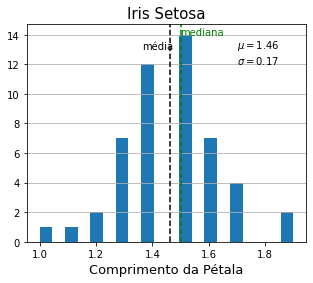

In [124]:
# Histograma individual para cada espécie

selecao = df['espécie'] == 'Iris-setosa'
df_is = df[selecao]
sigma = df_is['comprimento_pétala'].std()
mu = df_is['comprimento_pétala'].mean()
mediana = df_is['comprimento_pétala'].median()

fig, ax = plt.subplots(figsize=(5,4))
fig.patch.set_facecolor('white')
ax.hist(df_is['comprimento_pétala'], bins = 20)
ax.set_title('Iris Setosa', fontsize=15)
ax.set_xlabel('Comprimento da Pétala', fontsize=13)
ax.grid(True, axis='y')

ax.annotate(text= f'$\mu = {mu:.2f} $\n$\sigma = {sigma:.2f}$', xy=(1.7,12), fontsize=10)
ax.axvline(x=mu, color='k', linestyle='--')
ax.annotate(text='média', xy=(mu-0.1,13), fontsize=10)
ax.axvline(x=mediana, color='g', linestyle='--')
ax.annotate(text='mediana', xy=(mediana, 14), fontsize=10, color='g')
ax

fig.savefig(fname='histograma_is.png', bbox_inches = 'tight')

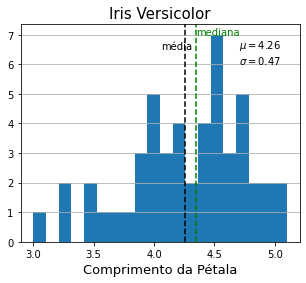

In [125]:
selecao = df['espécie'] == 'Iris-versicolor'
df_vs = df[selecao]
sigma = df_vs['comprimento_pétala'].std()
mu = df_vs['comprimento_pétala'].mean()
mediana = df_vs['comprimento_pétala'].median()

fig, ax = plt.subplots(figsize=(5,4))
fig.patch.set_facecolor('white')
ax.hist(df_vs['comprimento_pétala'], bins = 20)
ax.set_title('Iris Versicolor', fontsize=15)
ax.set_xlabel('Comprimento da Pétala', fontsize=13)
ax.grid(True, axis='y')

ax.annotate(text= f'$\mu = {mu:.2f} $\n$\sigma = {sigma:.2f}$', xy=(4.7,6), fontsize=10)
ax.axvline(x=mu, color='k', linestyle='--')
ax.annotate(text='média', xy=(mu-0.2,6.5), fontsize=10)
ax.axvline(x=mediana, color='g', linestyle='--')
ax.annotate(text='mediana', xy=(mediana, 7), fontsize=10, color='g')
ax

fig.savefig('histograma_vs.png', bbox_inches='tight')

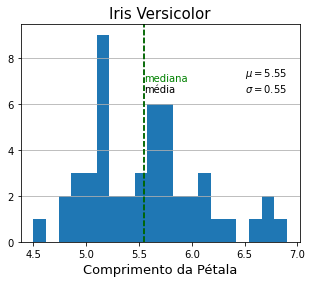

In [126]:
selecao = df['espécie'] == 'Iris-virginica'
df_ivg = df[selecao]
sigma = df_ivg['comprimento_pétala'].std()
mu = df_ivg['comprimento_pétala'].mean()
mediana = df_ivg['comprimento_pétala'].median()

fig, ax = plt.subplots(figsize=(5,4))
fig.patch.set_facecolor('white')
ax.hist(df_ivg['comprimento_pétala'], bins = 20)
ax.set_title('Iris Versicolor', fontsize=15)
ax.set_xlabel('Comprimento da Pétala', fontsize=13)
ax.grid(True, axis='y')

ax.annotate(text= f'$\mu = {mu:.2f} $\n$\sigma = {sigma:.2f}$', xy=(6.5,6.5), fontsize=10)
ax.axvline(x=mu, color='k', linestyle='--')
ax.annotate(text='média', xy=(mu,6.5), fontsize=10)
ax.axvline(x=mediana, color='g', linestyle='--')
ax.annotate(text='mediana', xy=(mediana, 7), fontsize=10, color='g')
ax

fig.savefig('histograma_ivg', bbox_inches='tight')

In [127]:
from PIL import Image
# https://pillow.readthedocs.io/en/stable/reference/Image.html

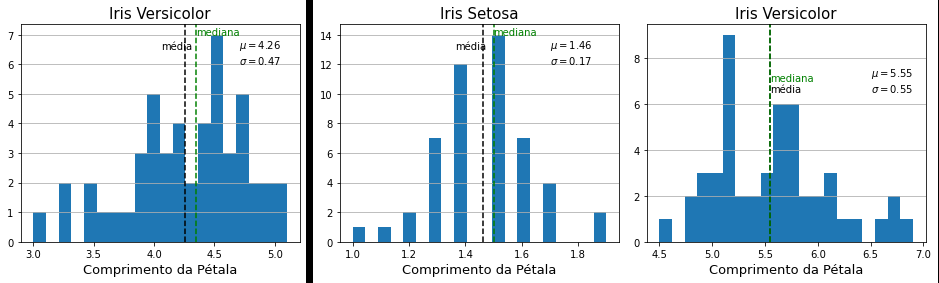

In [130]:
largura, altura = Image.open('histograma_is.png').size
combinada = Image.new(mode='RGB', size=(3*largura,altura))
intervalo = 0

for imagem in map(Image.open, [ 'histograma_vs.png', 'histograma_is.png', 'histograma_ivg.png']):
    combinada.paste(imagem, box=(intervalo,0))
    intervalo += largura

combinada.save('combinada.png')
combinada